In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv
/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv


In [2]:
data = pd.read_csv('/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# **Analisis Exploratorio de Datos**

Pasos para realizar EDA:
1. Cargar los datos
2. Revision inicial (tipos, cantidad, nombres)
3. Resumen estadistico 
4. Visualizacion inicial 
5. Manejo de datos faltantes
6. Analisis de distribucion (variables relevantes)
7. Identificacion de datos atipicos
8. Analisis de relaciones (correlaciones)
9. Segmentacion y Agrupacion
10. Iteracion y Descubrimiento (preguntas)
11. Documentacion y Comunicacion (reporte)

## Descripcion del conjunto


In [3]:
data.shape #Cantidad de datos(filas, columnas)

(271116, 15)

### Preguntas:

1. Cuantas medallas se han dado en cada categoria?
2. Que deportes son los mas populares?
3. Cuantos hombres y mujeres han participado en los juegos Olimpicos?

In [4]:
data.info() #informacion del conjunto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


Omitiendo las columnas Id, y nombre, que resultan irrelevantes para nuestro analisis, contamos con 4 variables numericas, y 7 variables categoricas. en nuestras varaibles numerica de edad, peso y estatura tenemos algunos valores faltantes que trataremos despues. El caso mas evidente de valores faltantes es la columna medal, esta hace referencia a si los participantes obtuvieron una medalla, dado que participan mucho atletas y solo 3 ganan una presea es comprensible que el resto se catalogue como vacio

In [5]:
#Resumen estadistico
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


Referente a nuestras varaibles numericas, encontramos que el valor promedio de los atletas ronda los 25 años, lo cual es comprensible, pero los valores minimo y maximo de esta columna son bastante atipicos; por su parte los valores de estatura y peso tienen un promedio cercano a valores comunes en hombres, mientras que sus min y max, corresponde a con la columna de edad en cuento al peso de los atletas, al igual que el min de la estatura, mientras que la estura maxima de 214 cm podria deberse a atletas que juegan basquetbol o algun deporte donde es tipicamente un estatura alta. 
Por su parte la columna años obtenemos los años en los que se ha recabado la informacion de los atletas participandes en estas ediciones de juegos olimpicos desde 1896 hasta 2016

*Datos faltantes*

In [6]:
#columnas numericas
numeric_columns = data.select_dtypes(include=['number'])
#obtener columnas numericas

for column in numeric_columns.columns:
    data[column] = data[column].fillna(data[column].mean())
#Rellanar valores na con promedio de la columna

In [7]:
#variables categoricas
data['Medal'] = data['Medal'].fillna('Sin Medalla')

In [8]:
data.info() #verificar no existan datos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     271116 non-null  float64
 4   Height  271116 non-null  float64
 5   Weight  271116 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   271116 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [9]:
data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.00000,271116.000000,271116.000000
mean,68248.954396,25.556898,175.33897,70.702393,1978.378480
std,39022.286345,6.280857,9.27810,12.574690,29.877632
min,1.000000,10.000000,127.00000,25.000000,1896.000000
25%,34643.000000,22.000000,170.00000,63.000000,1960.000000
50%,68205.000000,25.000000,175.33897,70.702393,1988.000000
75%,102097.250000,28.000000,180.00000,75.000000,2002.000000
max,135571.000000,97.000000,226.00000,214.000000,2016.000000


Una vez que hemos tratado los datos faltantes, podemos volver a observar las estadisticas de los datos numericos, las cuales continuan teniendo un comportamiento similar, en cuento a su distribucion, sin embargo esto no sucede en todos los casos, por lo que es importante tratar con los valores faltantes

Analisis del conjunto

In [10]:
#librerias graficas
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

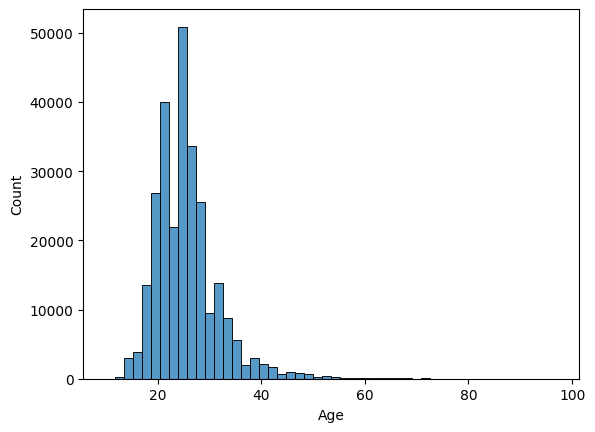

In [11]:
sns.histplot(data=data, x='Age', bins=50)
#Datos tienen cola larga - datos atipicos, 
#ya que se concentra a la izquierda la mayoria de datos

Podemos observar la distribucion de los datos de edad, y ver que la mayoria de los atletas rondan entre edades cercanas a los 20 y menores a 30, lo cual es la edad cuspite en la mayoria de los deportistas; aunque tambien presentamos algunos valores, demasiado pequeños como 10 años, y algunos valores superiores a 40, los cuales no son muy comunes pero pueden presentarse, debido a la diversidad de deportes en este conjunto.

En la siguente grafica, podemos observar la distribucion de los datos y aquellos valores que podriamos considerar atipicos en el conjunto

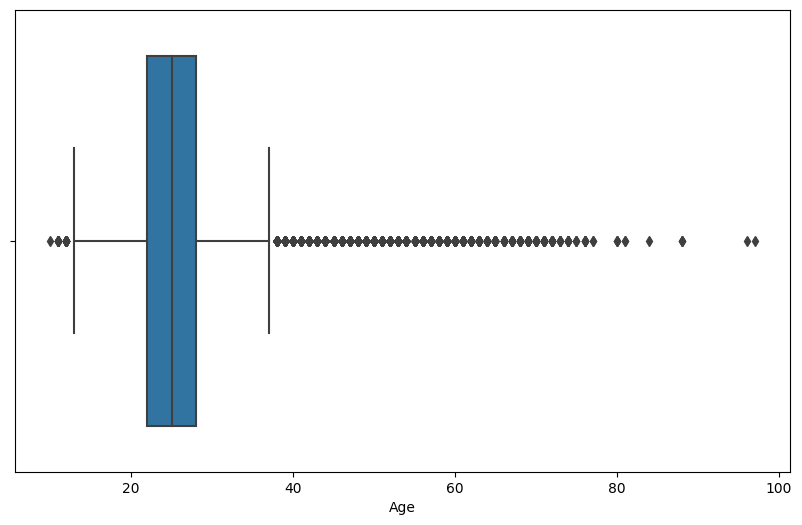

In [12]:
#boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=data['Age'])
plt.show()

In [13]:
from scipy import stats 

In [14]:
#rango intercuartilico
stats.iqr(data['Age'])

6.0

In [15]:
#25/75 -/+ (1.5*IQR)
print('Valor maximo normal:',28+(1.5*6))
print('Valor minimo normal:',22-(1.5*6))

Valor maximo normal: 37.0
Valor minimo normal: 13.0


El boxplot de edad nos indica que valores se considerarian atipicos a los datos, estos valores podemos encontrarlos mediante la determinacion del ranfo intercuartil, que nos indica que nuestros valores normales se encontrarian dentro del rango de 13 a 37 años. Como se observo en las graficas, existen muchos mas valores atipicos en un rango mayor conforme la edad aumenta

In [16]:
atletas_mayores = data[data['Age']>37]
atletas_mayores.shape
#Existen 11 928 atletas mayores a 37 años, que corresponderian a atletas con edad no comun de participacion

(11928, 15)

In [17]:
atletas_menores = data[data['Age']<13]
atletas_menores.shape
#Por su parte, solo han participado, 53 atletas menores a 13 años, los cuales consideriamos casos extraordinarios

(53, 15)

In [18]:
#deportes que practican mas los atletas mayores
atletas_mayores['Sport'].value_counts().head(5)

Sport
Shooting            3178
Art Competitions    2226
Equestrianism       1997
Sailing             1040
Fencing             1031
Name: count, dtype: int64

Podemos observar que los deportes que mas practican las personas mayores, con deportes de menor impacto fisico como son el tiro, la vela, o como la equitacion y el esgrima que requiere de mucha mas tecnica y conocimiento, e incluso otros como las competencias de arte, que existio como deporte olimpico entre 1912 y 1948

In [19]:
atletas_menores['Sport'].value_counts().head()

Sport
Swimming          25
Figure Skating    15
Rowing             5
Gymnastics         5
Athletics          2
Name: count, dtype: int64

Por su parte los 5 deportes mas practicados por atletas menores a 13  años, son disciplinas como natacion, gimnasia, patinaje artistico, que son deportes que su practica comienza desde muy temprana edad en los niños, por lo que con una buena formacion podrian ser atletas profesionales en menos de 13  años. Al igual que con deportes como el atletimos y el remo, que son deportes muy practicados en varios paises, por lo que los niños pueden practicarlos en su familia desde temprana edad

*Variables categoricas*

In [20]:
#obtener las columnas con variables de texto
text_columns = data.select_dtypes(include=['object'])
text_columns.columns

Index(['Name', 'Sex', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport',
       'Event', 'Medal'],
      dtype='object')

In [21]:
for column in text_columns.columns:
    if column != 'Name':
        print(data[column].value_counts().head())
        print()
#obtener los valores mas populares de cada columna

Sex
M    196594
F     74522
Name: count, dtype: int64

Team
United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Name: count, dtype: int64

NOC
USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
Name: count, dtype: int64

Games
2000 Summer    13821
1996 Summer    13780
2016 Summer    13688
2008 Summer    13602
2004 Summer    13443
Name: count, dtype: int64

Season
Summer    222552
Winter     48564
Name: count, dtype: int64

City
London            22426
Athina            15556
Sydney            13821
Atlanta           13780
Rio de Janeiro    13688
Name: count, dtype: int64

Sport
Athletics     38624
Gymnastics    26707
Swimming      23195
Shooting      11448
Cycling       10859
Name: count, dtype: int64

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3958
Water Polo Men's Water Polo    3358
Basketball Men's Basketball    3280
Name: count, dtype: int64

Aqui podemos observar los valores(5) mas comunes en nuestras varaibles categoricas, los cuales nos proporcionan mucha informacion de acuerdo a la informacion que la columna contiene.
1. Sexo: ha existido una significativa mayor participacion de hombres que de mujeres atletas.
2. Team - NOC: indica los paises con mas atletas participantes en los juegos, encabezado por USA, seguido por francia y gran bretaña.
3. Games: las ediciones de juegos olimpicos que mas participantes han tenido, don observamos que ha partir de 1996 el numero de atletas a sido mayor
4. Season: Observamos que contamos con dos ediciones de juegos olimpicos y que existe un mayor numero de participacion en los juegos de verano, lo que pude deberse a la cantidad de deportes que estos engloban.
5. City: las ciudades donde mas atletas han articipado, encabezada por London, la cual ha albergado los juegos de verano en 3 ocasiones
6. Sport: los deportes con mas atletas particpantes, encontramos deportes como atletismo, gimnasia, natacion, ciclismo y tiro, que son de los primeros deportes en los juegos olimpicos y continuan estando vigentes
7. Event: las competencias donde mas atletas han participado, donde podemos observar que son competencias en equipo y en la rama varonil
8. Medal: conde observamos que un gran porcentaje de los atletas participantes no han obtenido una medalla, y que se han entregado mas medallas de oro, bronce y plata respectivamente.

In [22]:
#agrupacion de datos

In [23]:
#ultimos años
data.groupby('Year')[['Age','Height','Weight']].agg(['min','max','mean']).tail()

Age                  Height                    Weight                  
       min   max       mean    min    max        mean    min    max       mean
Year                                                                          
2008  12.0  67.0  25.734092  137.0  226.0  176.201381   28.0  214.0  71.389552
2010  15.0  51.0  26.124262  149.0  206.0  174.918373   38.0  116.0  70.740654
2012  13.0  71.0  25.961378  140.0  221.0  176.250460   33.0  214.0  71.302389
2014  15.0  55.0  25.987324  146.0  206.0  174.818806   41.0  116.0  70.757539
2016  13.0  62.0  26.207919  133.0  218.0  176.025326   30.0  170.0  70.983974

In [24]:
#Edad de los participantes en las ediciones de verano e invierno
data.groupby(['Season','Sex'])['Age'].agg(['min','max','mean'])

min   max       mean
Season Sex                       
Summer F    11.0  74.0  23.674297
       M    10.0  97.0  26.396239
Winter F    11.0  48.0  24.015114
       M    12.0  58.0  25.504698

In [25]:
#distribucion de los hombres y las mujeres en los deportes segun la edicion
data.groupby(['Season','Sex'])[['Team','Sport','Event']].nunique()

Team  Sport  Event
Season Sex                    
Summer F     352     40    214
       M    1118     49    491
Winter F     144     14     57
       M     214     17     67

In [26]:
#Edad, estatura y peso de los atletas ganadores de preseas
data.groupby(['Medal','Season','Sex'])[['Age','Height','Weight']].mean()

Age      Height     Weight
Medal       Season Sex                                  
Bronze      Summer F    24.634359  171.183455  64.052365
                   M    26.323907  179.426277  76.387936
            Winter F    25.115578  167.403429  61.382748
                   M    26.384883  178.890860  77.100403
Gold        Summer F    24.213271  171.665372  64.378546
                   M    26.473703  179.872225  76.872683
            Winter F    25.202636  167.619718  62.426866
                   M    26.596487  179.537387  77.784048
Silver      Summer F    24.292628  171.391190  64.056271
                   M    26.627032  179.483286  76.488482
            Winter F    25.240527  167.974450  62.260945
                   M    26.430566  179.085914  77.253308
Sin Medalla Summer F    23.540824  168.357685  60.593038
                   M    26.382399  177.587796  73.735763
            Winter F    23.855208  167.406713  60.885655
                   M    25.377882  177.842456  74.832962

Podemos observar que la edad de los atletas no es un parametro determinante para saber que medalla obtendran, pero si podemos observar que las mujeres en los juegos de verano obtiene a una edad menor (24) una medalla, mientras que en invierno el promedio es de 25 años, un años mas. Para el caso de los hombres tiene una edad similar promedio entre ambas ediciones de 26 años para obtener una medalla

**Graficas**

<Axes: xlabel='Height', ylabel='Weight'>

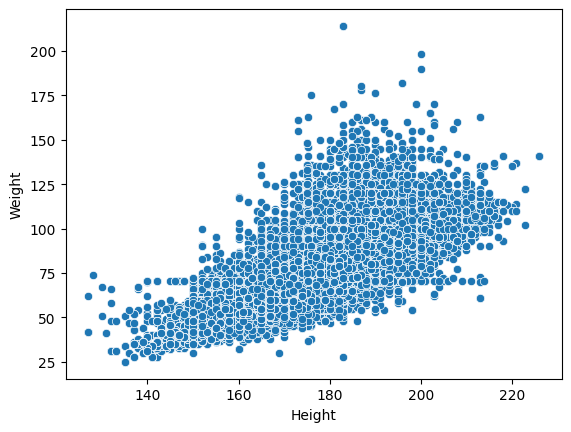

In [27]:
#diagrama de dispersion
sns.scatterplot(data=data, x='Height',y='Weight')

Podemos observar que existe una correlacion entre el peso de la estatura de los atletas, lo cual seria esperado debido a que entre mas altos sean, mas mas muscular tendran.

<Axes: xlabel='Height', ylabel='Weight'>

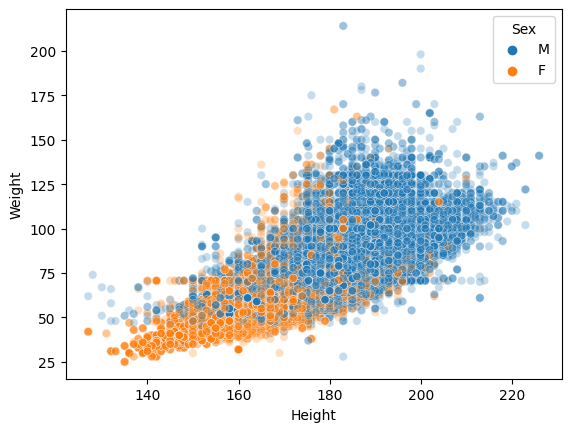

In [28]:
#diagrma de dispersion por categoria
sns.scatterplot(data=data, x='Height',y='Weight', hue='Sex', alpha=0.25)

Si separamos nuestos datos por sexo, podemos ver que las mujeres tienden a tener una menor estura y peso, mientras que los hombres tiende a ser mas alto y por ende a pesar mas

In [29]:
#correlacion entre los datos
data[['Age','Height','Weight']].corr()

,Age,Height,Weight
Age,1.000000,0.106944,0.161847
Height,0.106944,1.000000,0.786609
Weight,0.161847,0.786609,1.000000


<Axes: >

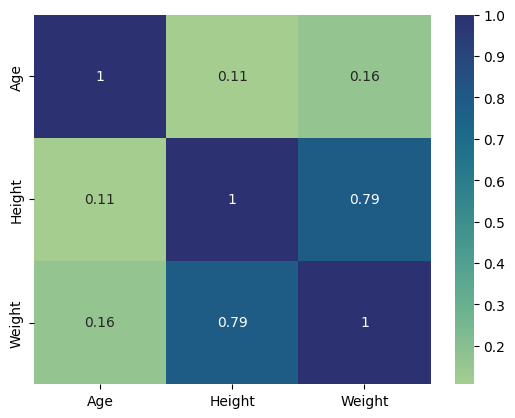

In [30]:
sns.heatmap(data[['Age','Height','Weight']].corr(), annot=True,cmap='crest')

Podemos observar que existe una buena correlacion entre el peso y la estura de los atleticas con un 79% de probabilidad de explicar el valor de uno con respecto a la otra varaible. Tambien observamos que los valores de peso y estaura no estan determinados por la edad de los atletas, lo cual puede ser debido al estilo de vida de los atletas y su genetica variable respecto a cada pais

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

<Axes: xlabel='Age', ylabel='Count'>

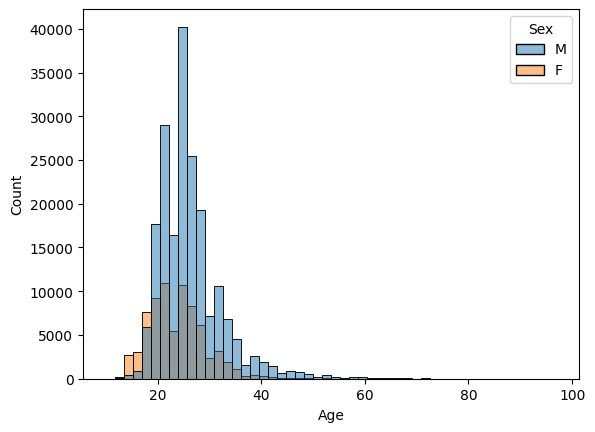

In [31]:
#histogramas por categoria
sns.histplot(data=data, x='Age', hue='Sex',bins=50)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


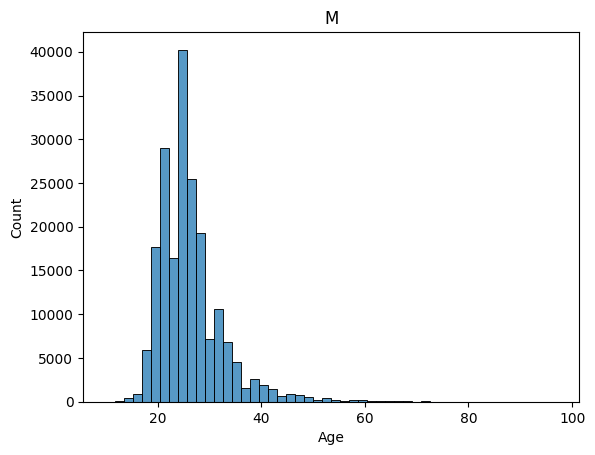

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


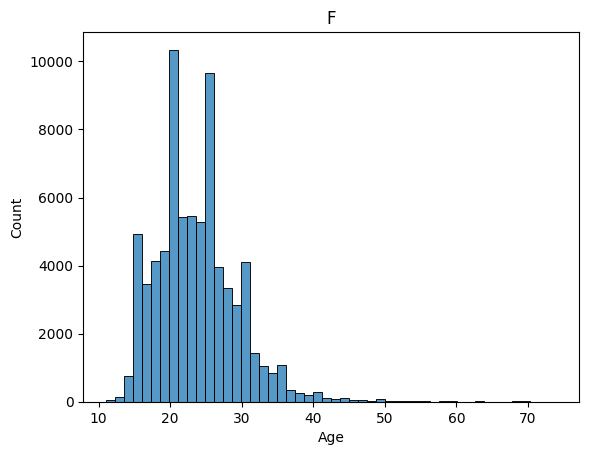

In [32]:
for value in data['Sex'].value_counts().index:
    sns.histplot(data=data[data['Sex']==value], x='Age',bins=50)
    plt.title(value)
    plt.show()

Considerando la significativa cifra de menor participacion de mujeres en los juegos olimpicos, aun podemos observar que la edad de las mujeres tiende a ser menor que la de los hombres, y concentrarse mas entre 14 y los 30 años, con un maximo de 70 años, mientras que los hombres oscilan entre 20 y los 40 años, con valores cercanos a los 100 años.

Lo esto podemos verlo mejor representado en la siguente grafica:

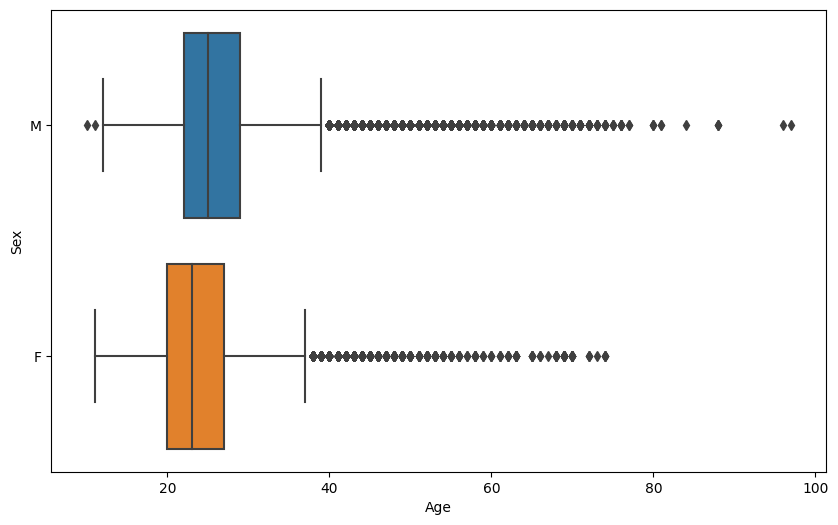

In [33]:
#boxplot por categoria
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Age',y='Sex')
plt.show()

<Axes: xlabel='Age', ylabel='Sex'>

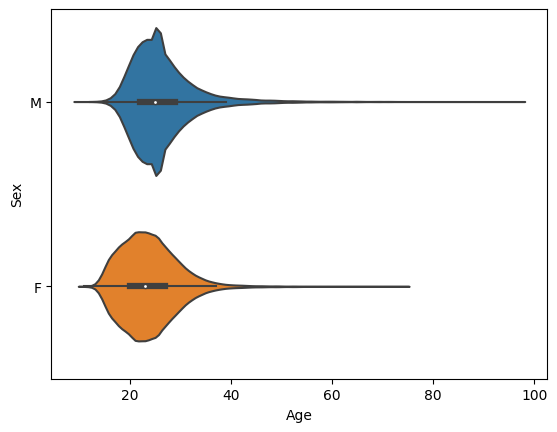

In [34]:
#violinplots
sns.violinplot(data=data, x='Age',y='Sex')
#la distribucion de edad de las mujeres tienen valores atipicos, pero un comportamiento normal, 
#mientras que la de los hombre presenta valores atipicos y una concetracion atipica mayor cercanoa los 30 años

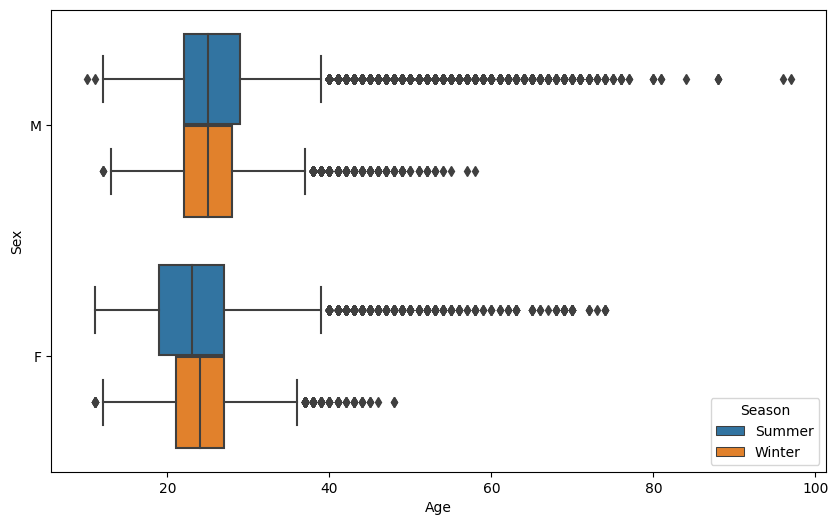

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data,x='Age',y='Sex',hue='Season')
plt.show()

En el grafico anterior podemos observar, el comportamiento de la edad de los atletas segun su sexo y la edicion de juegos en que se desempeñan, donde observamos que existen mas edades atipicas en los atletas de verano, lo cual pude deberse a las condiciones climaticas que los juegos de invierno implican o a la variedad de deportes que se ofertan en cada edicion

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Year', ylabel='Age'>

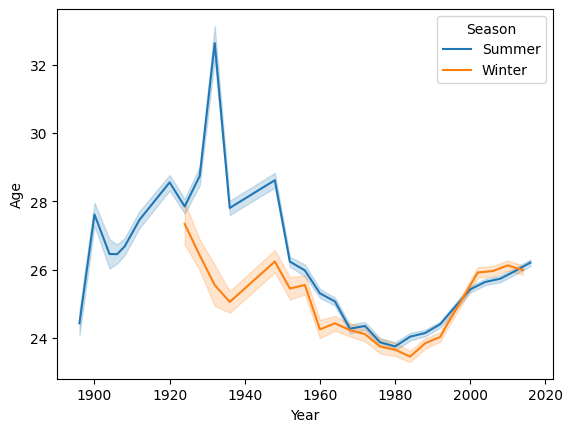

In [36]:
sns.lineplot(data=data,x='Year',y='Age',hue='Season')

Podemos ver el comportamiento de la edad de los atletas en los largo de los años, en las ediciones de invierno y verano. Donde podemos observar valores interesantes como:
* Mayor edad al inicio de los juegos de invierno (deberse a la migracion de deportistas/ poco conocimiento de atletas jovenes sobre la competencia)
* La edad en ambas ediciones bajo cercano a 1980, años posteriores a la segunda guerra mundial
* Pico maximo de edad en las ediciones de 1930
* Ultimos años la edad a crecido y se a mantenido carcana a los 25 años

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Year', ylabel='Age'>

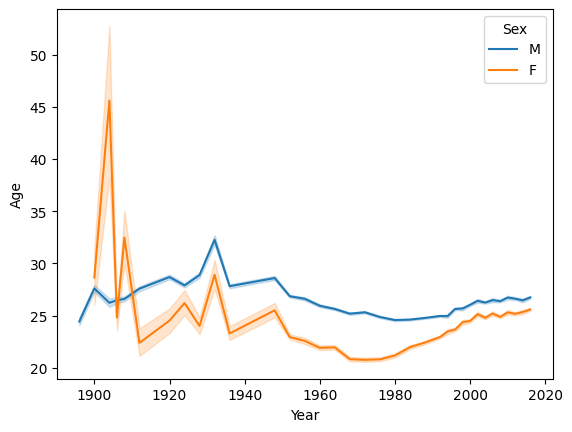

In [37]:
sns.lineplot(data=data,x='Year',y='Age',hue='Sex')

En la grafica anterior podemos observar que la edad de las mujeres atletas a sido siempre menor que la de los hombres a excepcion de los años 1900 y 1910, que fueron cuando se integro a las mujeres en las olimpiadas

In [38]:
sexo = data.groupby(['Year','Season'])['Sex'].value_counts().reset_index()
sexo

,Year,Season,Sex,count
0,1896,Summer,M,380
1,1900,Summer,M,1903
2,1900,Summer,F,33
3,1904,Summer,M,1285
4,1904,Summer,F,16
...,...,...,...,...
96,2012,Summer,F,5815
97,2014,Winter,M,2868
98,2014,Winter,F,2023
99,2016,Summer,M,7465


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

<Axes: xlabel='Year', ylabel='count'>

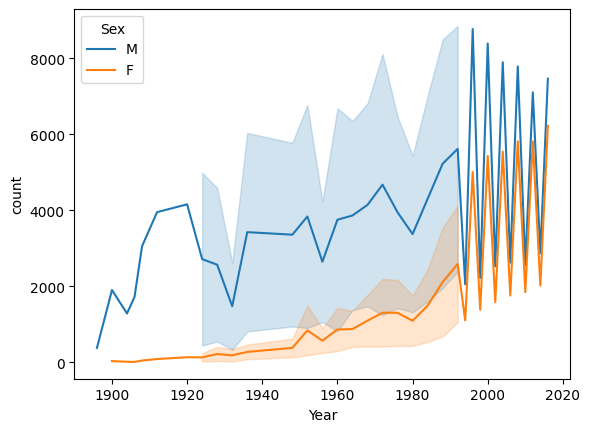

In [39]:
sns.lineplot(data=sexo,x='Year',y='count',hue='Sex')

Podemos observar la participacion de hombres y mujeres en los juegos olimpicos a lo largo de los años, observando que se incluyo a las mujeres años despues, y su participacion a sido significativamente menor que la de los hombres hasta la actualidad, donde la diferencia es menor 

In [40]:
#Deportes en las ediciones de verano e invierno
sports = data.groupby(['Season'])['Sport'].unique().tolist()
print('deportes invierno: ',len(sports[1]))
print(sports[1])
print('deportes verano: ',len(sports[0]))
print(sports[0])

deportes invierno:  17
['Speed Skating' 'Cross Country Skiing' 'Ice Hockey' 'Biathlon'
 'Alpine Skiing' 'Luge' 'Bobsleigh' 'Figure Skating' 'Nordic Combined'
 'Freestyle Skiing' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Short Track Speed Skating' 'Skeleton' 'Military Ski Patrol' 'Alpinism']
deportes verano:  52
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Athletics' 'Swimming'
 'Badminton' 'Sailing' 'Gymnastics' 'Art Competitions' 'Handball'
 'Weightlifting' 'Wrestling' 'Water Polo' 'Hockey' 'Rowing' 'Fencing'
 'Equestrianism' 'Shooting' 'Boxing' 'Taekwondo' 'Cycling' 'Diving'
 'Canoeing' 'Tennis' 'Modern Pentathlon' 'Golf' 'Softball' 'Archery'
 'Volleyball' 'Synchronized Swimming' 'Table Tennis' 'Baseball'
 'Rhythmic Gymnastics' 'Rugby Sevens' 'Trampolining' 'Beach Volleyball'
 'Triathlon' 'Rugby' 'Lacrosse' 'Polo' 'Cricket' 'Ice Hockey' 'Racquets'
 'Motorboating' 'Croquet' 'Figure Skating' 'Jeu De Paume' 'Roque'
 'Basque Pelota' 'Alpinism' 'Aeronautics']


In [41]:
#Eventos por deporte
events = data.groupby(['Sport'])['Event'].value_counts().reset_index()
events

,Sport,Event,count
0,Aeronautics,Aeronautics Mixed Aeronautics,1
1,Alpine Skiing,Alpine Skiing Men's Slalom,1593
2,Alpine Skiing,Alpine Skiing Men's Giant Slalom,1535
3,Alpine Skiing,Alpine Skiing Men's Downhill,1164
4,Alpine Skiing,Alpine Skiing Women's Slalom,966
...,...,...,...
760,Wrestling,"Wrestling Men's Middleweight B, Greco-Roman",29
761,Wrestling,"Wrestling Women's Featherweight, Freestyle",19
762,Wrestling,"Wrestling Women's Light-Heavyweight, Freestyle",18
763,Wrestling,"Wrestling Men's Unlimited Class, Greco-Roman",5


In [42]:
medallas = data.groupby(['Sport'])['Medal'].value_counts().reset_index()
medallas

,Sport,Medal,count
0,Aeronautics,Gold,1
1,Alpine Skiing,Sin Medalla,8401
2,Alpine Skiing,Silver,144
3,Alpine Skiing,Gold,143
4,Alpine Skiing,Bronze,141
...,...,...,...
244,Weightlifting,Silver,213
245,Wrestling,Sin Medalla,5858
246,Wrestling,Bronze,468
247,Wrestling,Silver,415


In [43]:
#medallas entregadas por deporte
medal = medallas[medallas['Medal']!='Sin Medalla']
medal.sort_values(by='count',ascending=False).head(10)

,Sport,Medal,count
15,Athletics,Gold,1339
16,Athletics,Silver,1334
17,Athletics,Bronze,1296
202,Swimming,Gold,1099
203,Swimming,Silver,993
159,Rowing,Bronze,990
160,Rowing,Gold,978
161,Rowing,Silver,977
204,Swimming,Bronze,956
98,Gymnastics,Gold,791
